In [2]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./Ficheiros/train.csv")

In [4]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Jeep,Wrangler Sport,2014,"71,000 mi.",Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Black,None reported,Yes,22000
1,Toyota,Highlander XLE,2015,"68,575 mi.",Gasoline,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,26000
2,Toyota,Camry Hybrid XLE,2018,"69,641 mi.",Hybrid,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,CVT Transmission,White,Black,At least 1 accident or damage reported,Yes,23995
3,Subaru,Outback Touring XT,2021,"33,500 mi.",Gasoline,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Blue,Brown,None reported,Yes,34000
4,Lexus,GX 460 Base,2018,"75,000 mi.",Gasoline,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,At least 1 accident or damage reported,Yes,38095


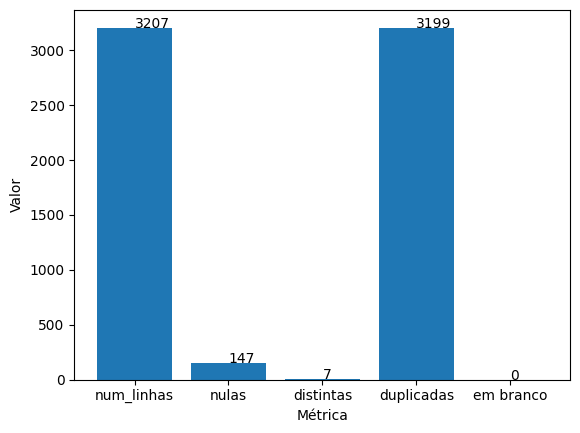

In [5]:
data = [
    df.shape[0],
    df["fuel_type"].isnull().sum(),
    df["fuel_type"].nunique(),
    df["fuel_type"].duplicated().sum(),
    df["fuel_type"].str.isspace().sum(),
]

index=["num_linhas", "nulas", "distintas", "duplicadas", "em branco"]

plt.bar(index, data)

plt.xlabel("Métrica")
plt.ylabel("Valor")

for i in range(len(data)):
    plt.annotate(str(data[i]), (index[i], data[i]))

plt.show()

Existem 147 linhas nulas que precisam de ser preenchidas. Podemos também observar que existem apena 7 tipos diferentes de combustiveis.

C:\Users\gonca\AppData\Local\Temp\ipykernel_23292\2168122939.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(str(milhas[i]), (milhas.index[i], milhas[i]))


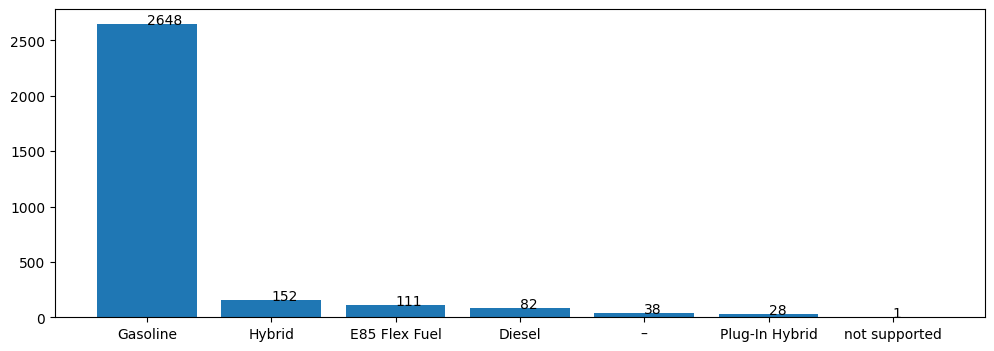

In [6]:
# Obter os 10 valores mais frequentes
milhas = df['fuel_type'].value_counts()

# Criar um gráfico de barras
plt.figure(figsize=(12, 4))
plt.bar(milhas.index, milhas)

for i in range(len(milhas)):
    plt.annotate(str(milhas[i]), (milhas.index[i], milhas[i]))

plt.show()

Podemos verificar que os carros a gasolina são os mais comuns.
Existem também 38 veiculos cujo combustivel nao é especificado e precisa de modificado para outro, sendo tambem incluido o not supported. 
Os carros hibridos e Plug in hibridos podem ser agrupados num so. 

In [41]:
df[df["fuel_type"].isnull()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
15,Tesla,Model S 75D,2016,"102,260 mi.",NaN,518.0HP Electric Motor Electric Fuel System,1-Speed A/T,White,Black,None reported,Yes,31300
38,BMW,i3 Base,2015,"26,000 mi.",NaN,170.0HP 0.65L Electric Motor Electric Fuel System,1-Speed A/T,White,Beige,None reported,Yes,14999
53,Tesla,Model 3 Long Range,2019,"27,123 mi.",NaN,425.0HP Electric Motor Electric Fuel System,A/T,Red,Black,None reported,Yes,38200
81,Rivian,R1S Launch Edition,2023,299 mi.,NaN,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,Blue,Gray,None reported,Yes,92500
112,Tesla,Model 3 Standard Range Plus,2021,"21,600 mi.",NaN,271.0HP Electric Motor Electric Fuel System,A/T,White,Black,None reported,Yes,31000
...,...,...,...,...,...,...,...,...,...,...,...,...
3069,Tesla,Model Y Performance,2022,"30,000 mi.",NaN,455.0HP Electric Motor Electric Fuel System,A/T,White,White,None reported,Yes,51999
3079,Tesla,Model X Long Range,2022,"15,443 mi.",NaN,670.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Black,None reported,Yes,84500
3102,Chevrolet,Bolt EUV Premier,2022,"31,000 mi.",NaN,200.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,White,None reported,Yes,36000
3131,Tesla,Model Y Long Range,2020,"88,000 mi.",NaN,425.0HP Electric Motor Electric Fuel System,1-Speed A/T,Gray,White,None reported,Yes,35500


In [40]:
df[df["engine"].str.contains("Electric")]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
2,Toyota,Camry Hybrid XLE,2018,"69,641 mi.",Hybrid,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,CVT Transmission,White,Black,At least 1 accident or damage reported,Yes,23995
12,Toyota,Camry Hybrid Base,2007,"53,249 mi.",Hybrid,147.0HP 2.4L 4 Cylinder Engine Gas/Electric Hy...,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,9250
15,Tesla,Model S 75D,2016,"102,260 mi.",NaN,518.0HP Electric Motor Electric Fuel System,1-Speed A/T,White,Black,None reported,Yes,31300
38,BMW,i3 Base,2015,"26,000 mi.",NaN,170.0HP 0.65L Electric Motor Electric Fuel System,1-Speed A/T,White,Beige,None reported,Yes,14999
50,BMW,330e iPerformance,2018,"45,253 mi.",Plug-In Hybrid,247.0HP 2.0L 4 Cylinder Engine Plug-In Electri...,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,24995
...,...,...,...,...,...,...,...,...,...,...,...,...
3151,Mercedes-Benz,E-Class E 450 4MATIC,2021,"18,000 mi.",Hybrid,362.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,9-Speed A/T,Gray,Black,At least 1 accident or damage reported,Yes,62000
3158,Tesla,Model Y Long Range,2023,"7,414 mi.",NaN,425.0HP Electric Motor Electric Fuel System,A/T,Black,White,None reported,Yes,56515
3161,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
3164,Kia,Sportage Plug-In Hybrid X-Line,2023,"1,340 mi.",Plug-In Hybrid,177.0HP 1.6L 4 Cylinder Engine Plug-In Electri...,A/T,Black,Black,None reported,Yes,41000


Através das tabelas acima podemos verificar que os carros cujo combustivel não é preenchido, correspondem a carros Eletricos, podendo o combustivel destes ser considerado Eletrico.

In [18]:
display(df[(df['fuel_type'].isnull()) & ~(df['engine'].str.contains('Electric'))][['fuel_type','engine']])

,fuel_type,engine
399,NaN,111.2Ah / FR 70kW / RR 160kW (697V)
1311,NaN,Standard Range Battery
1552,NaN,Dual Motor - Standard
2622,NaN,Dual Motor - Standard
